In [2]:
from CODE import *


In [3]:
data = pd.read_csv('data.csv')

X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# First, split the data into train+val set and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
# Next, split the train+val set into train set and val set 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=6)
tensors = Perceptron.data_to_tensors(X_train, y_train, X_val, y_val, X_test, y_test)

In [4]:
Perceptron.set_seed(0)

model = Perceptron(input_dim=X_train.shape[1], hidden_layers=[])
optimizer = torch.optim.Adam(model.parameters())
results = Perceptron.train_model(model, optimizer, tensors,save_best_model=False)
print(f"Test Accuracy = {100 * results['test_accuracy']:.2f}%")


Test Accuracy = 67.54%


In [5]:
def print_differences(results):
    # 获取最后一个epoch的训练误差和验证误差
    final_train_loss = results['train_losses'][-1]
    final_val_loss = results['val_losses'][-1]
    loss_difference = final_val_loss - final_train_loss

    # 获取最后一个epoch的训练准确率和验证准确率
    final_train_accuracy = results['train_accuracies'][-1]
    final_val_accuracy = results['val_accuracies'][-1]
    accuracy_difference = final_train_accuracy - final_val_accuracy
    
    print(f"Loss difference (Validation - Training): {loss_difference:.4f}")
    print(f"Accuracy difference (Training - Validation): {accuracy_difference:.4f}\n")
print_differences(results)


Loss difference (Validation - Training): -0.0002
Accuracy difference (Training - Validation): 0.0368



In [7]:
Perceptron.set_seed(0)
# 定义神经元数量列表
neuron_numbers = [2, 8, 32, 128,256]

# 初始化存储结果的字典
results_dict = {}

for neuron_number in neuron_numbers:
    model = Perceptron(input_dim=X_train.shape[1], hidden_layers=[neuron_number])
    optimizer = torch.optim.Adam(model.parameters(), weight_decay= 0.01)
    results = Perceptron.train_model(model, optimizer, tensors,save_best_model=False)
    
    # 存储结果
    results_dict[neuron_number] = results
    print(f"For {neuron_number} neurons: Test Accuracy = {100 * results['test_accuracy']:.2f}%")


For 2 neurons: Test Accuracy = 74.56%
For 8 neurons: Test Accuracy = 74.56%
For 32 neurons: Test Accuracy = 75.00%
For 128 neurons: Test Accuracy = 74.56%
For 256 neurons: Test Accuracy = 74.56%


In [8]:
Perceptron.check_overfitting(results_dict)


For 2 neurons:
Loss difference (Validation - Training): -0.0121
Accuracy difference (Training - Validation): -0.0036

For 8 neurons:
Loss difference (Validation - Training): -0.0274
Accuracy difference (Training - Validation): -0.0189

For 32 neurons:
Loss difference (Validation - Training): -0.0274
Accuracy difference (Training - Validation): -0.0135

For 128 neurons:
Loss difference (Validation - Training): -0.0234
Accuracy difference (Training - Validation): -0.0135

For 256 neurons:
Loss difference (Validation - Training): -0.0209
Accuracy difference (Training - Validation): -0.0135



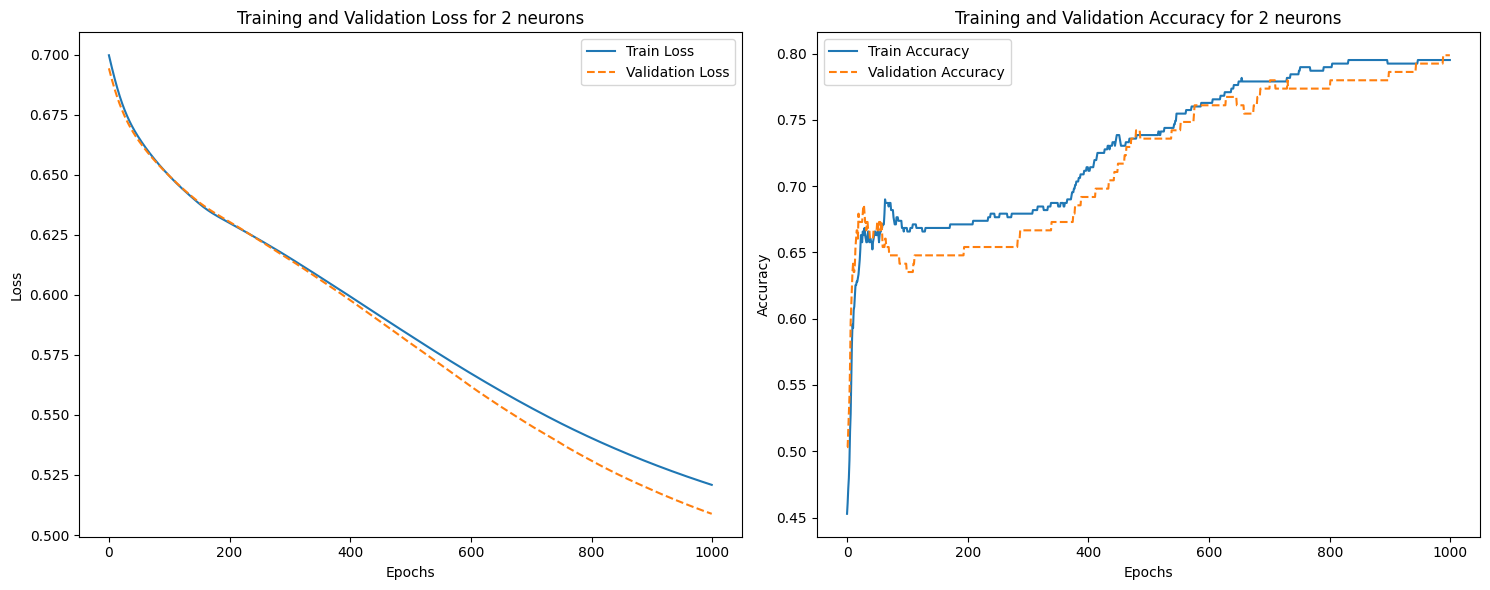

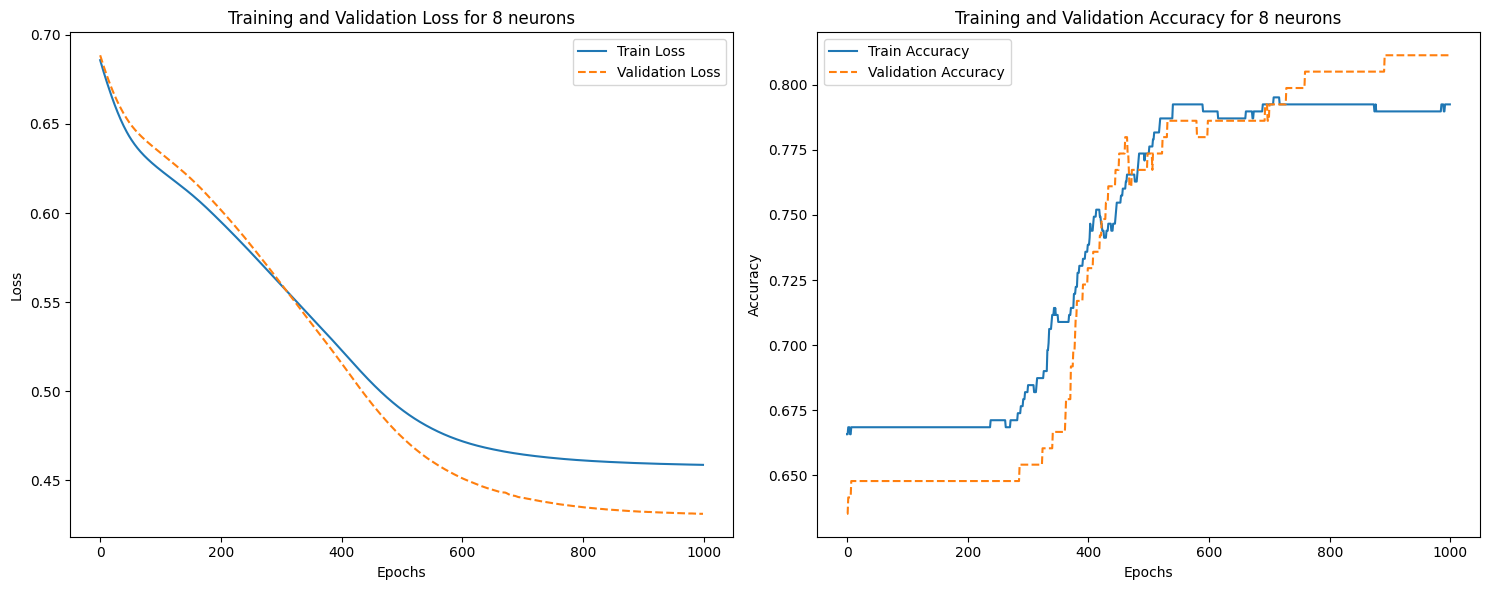

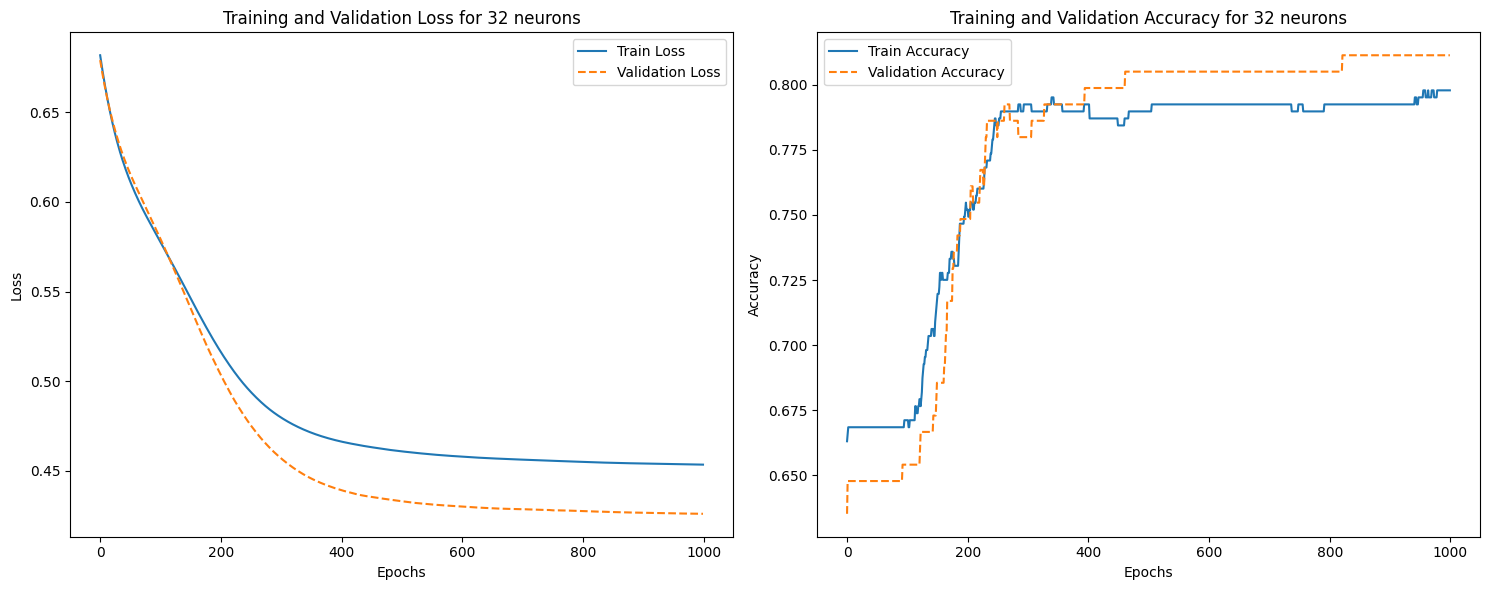

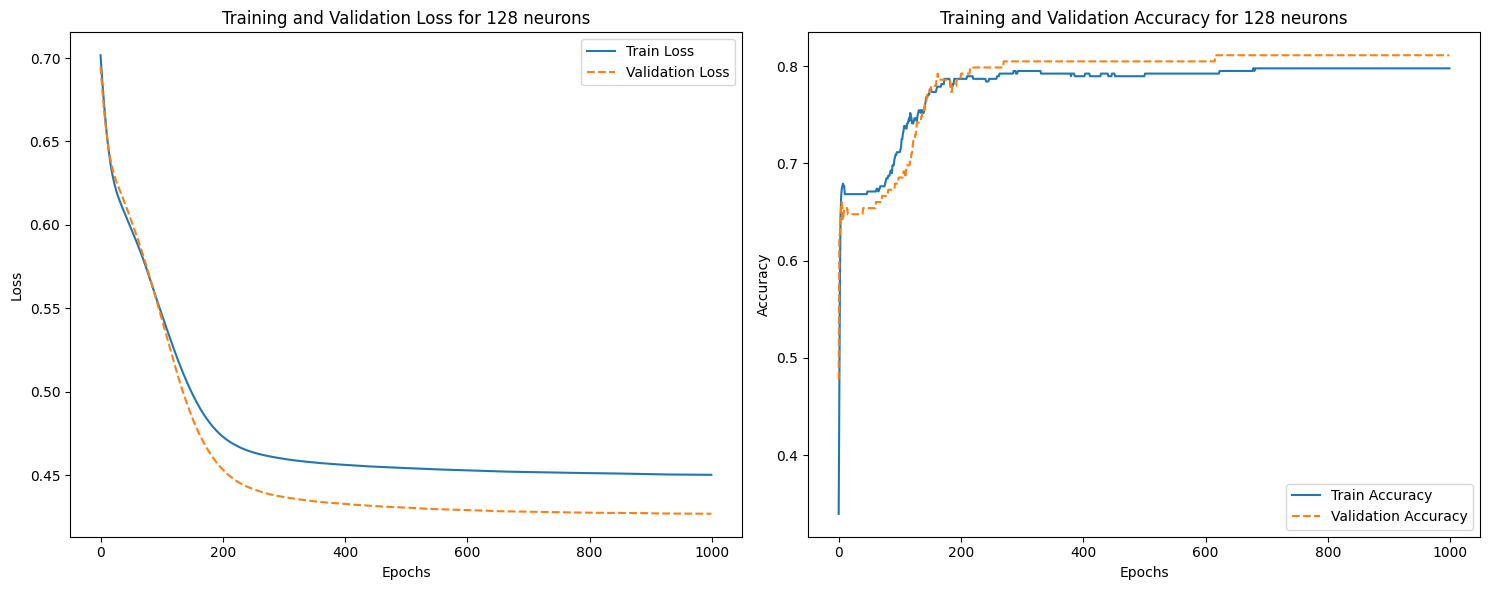

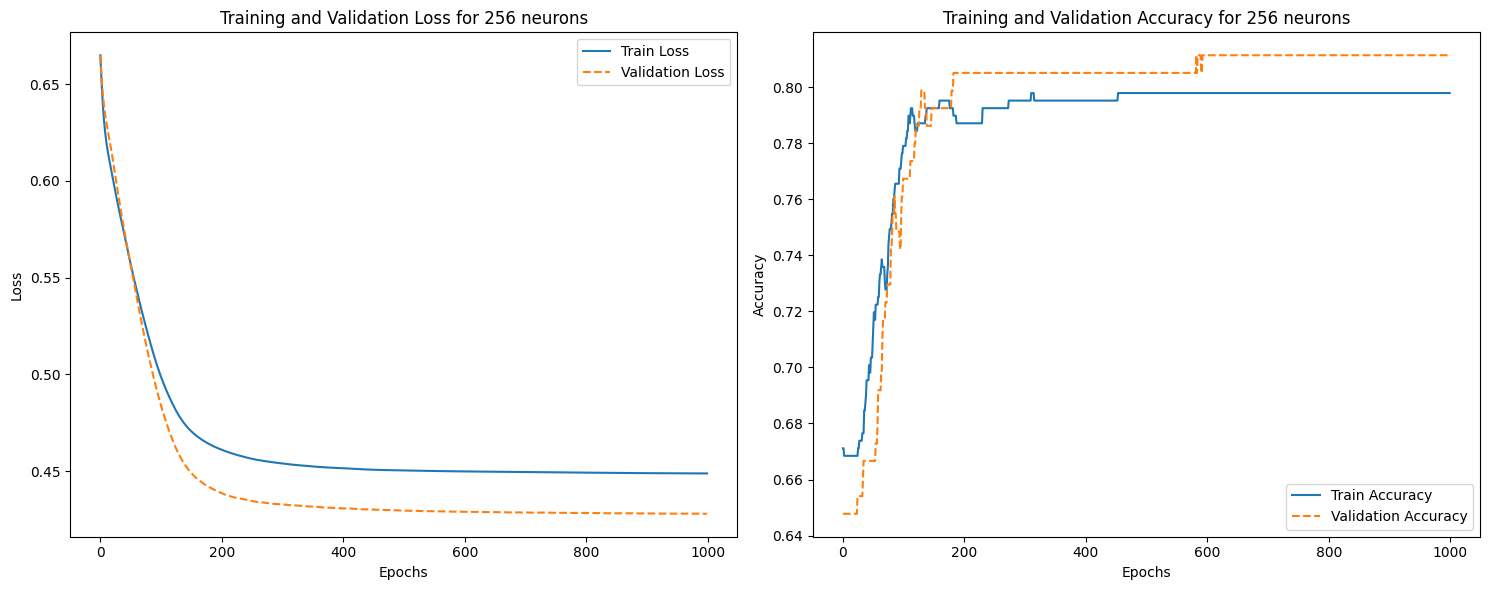

In [9]:
Perceptron.plot_training_results(results_dict)
